## Web Crawing
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crwaling Naver Stock Datas
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : url
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [110]:
import warnings
warnings.filterwarnings('ignore')
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [3]:
page= 1
page_size= 20
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
url

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=20&page=1'

#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [7]:
response = requests.get(url)
response # 응답 확인

<Response [200]>

In [9]:
response.text[:300]

'[{"localTradedAt":"2023-02-16","closePrice":"2,473.46","compareToPreviousClosePrice":"45.56","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.88","openPrice":"2,444.06","highPrice":"2,474.62","lowPrice":"2,442.07"},{"localTradedAt":"2023-02-15","closePrice":"2'

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [14]:
#json data to list (json 파싱)
data = response.json()
type(data)

list

In [17]:
#list data(json) to df
df = pd.DataFrame(data)
df.head(2)

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2023-02-16,"2,473.46",45.56,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.88,"2,444.06","2,474.62","2,442.07"
1,2023-02-15,"2,427.90",-37.74,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.53,"2,473.09","2,473.44","2,424.16"


In [19]:
#사용할 데이터 추출
df = df[['localTradedAt','closePrice']]
df.head(2)

,localTradedAt,closePrice
0,2023-02-16,"2,473.46"
1,2023-02-15,"2,427.90"


#### 4. 함수로 만들기

In [80]:
def stock_price(code='KOSPI',page=1,page_size=20):
    ''' This function is crawling stock price from naver.
    params:
        code : str : KOSPI, KOSDAQ
        page : int
        page_size : int
    return :
        type : DataFrame
    ''' 
    # 1. URL
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}'
    
    # 2. Request(URL) > Response : json(str)
    response = requests.get(url)
    
    # 3. json(str) > list, dict > DataFrame
    data = response.json()
    return pd.DataFrame(data)[['localTradedAt','closePrice']]

In [27]:
[var for var in dir(response) if var[0] != '_']

['apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [24]:
help(stock_price)

Help on function stock_price in module __main__:

stock_price(code, page, page_size)
    This function is crawling stock price from naver.
    params:
        code : str : KOSPI, KOSDAQ
        page : int
        page_size : int
    return :
        type : DataFrame



In [25]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [22]:
stock_price('KOSPI',1,5)

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2023-02-16,"2,473.56",45.66,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.88,"2,444.06","2,474.62","2,442.07"
1,2023-02-15,"2,427.90",-37.74,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.53,"2,473.09","2,473.44","2,424.16"
2,2023-02-14,"2,465.64",12.94,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.53,"2,471.33","2,480.34","2,459.83"
3,2023-02-13,"2,452.70",-17.03,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.69,"2,461.96","2,462.58","2,440.86"
4,2023-02-10,"2,469.73",-11.79,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.48,"2,470.65","2,473.80","2,454.74"


In [23]:
stock_price('KOSDAQ',1,5)

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2023-02-16,"2,473.89",45.99,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.89,"2,444.06","2,474.62","2,442.07"
1,2023-02-15,"2,427.90",-37.74,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.53,"2,473.09","2,473.44","2,424.16"
2,2023-02-14,"2,465.64",12.94,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.53,"2,471.33","2,480.34","2,459.83"
3,2023-02-13,"2,452.70",-17.03,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.69,"2,461.96","2,462.58","2,440.86"
4,2023-02-10,"2,469.73",-11.79,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.48,"2,470.65","2,473.80","2,454.74"


#### 5. 원달러 환율 데이터 수집 : 실습

In [73]:
def dolor_price(page=1,page_size=10,code='FX_USDKRW'):
    ''' this function is crawling dolor price from naver.
    params :
        page : int
        page_size : int
        code : str : FX_USDKRW
    return :
        DataFrame
    '''
    ### 1. URL
    #code ='FX_USDKRW'  ### dolor
    #code = 'FX_EURKRW' ### euro
    #code = 'FX_JPYKRW' ### jpyen
    ###
    #code = code+'_SHB' ### shinhan bank
    url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&pageSize={page_size}&category=exchange&reutersCode={code}'
    ### 2. request(URL) > response(json(str))
    response = requests.get(url)
    ### 3. json(str) > DataFrame
    data = response.json()
    df = pd.DataFrame(data['result'])
    return pd.DataFrame(df)[['localTradedAt','closePrice']]

In [89]:
d1 = dolor_price(1)
d2 = dolor_price(2)
usd_df = pd.concat([d1, d2],ignore_index=True)
usd_df.shape

(20, 2)

#### 6. 시각화

In [81]:
kospi_df = stock_price(code='KOSPI')
kospi_df.head(2)

,localTradedAt,closePrice
0,2023-02-16,"2,470.92"
1,2023-02-15,"2,427.90"


In [82]:
kosdaq_df = stock_price('KOSDAQ')
kosdaq_df.head(2)

,localTradedAt,closePrice
0,2023-02-16,781.91
1,2023-02-15,765.46


In [91]:
#데이터 전처리 : 데이터 타입 변경
usd_df['usd']=usd_df['closePrice'].apply(lambda data: float(data.replace(',','')))
usd_df.dtypes

localTradedAt     object
closePrice        object
usd              float64
dtype: object

In [93]:
kospi_df['kospi']=kospi_df['closePrice'].apply(lambda data: float(data.replace(',','')))
kosdaq_df['kosdaq']=kosdaq_df['closePrice'].apply(lambda data: float(data.replace(',','')))
kospi_df.head(1)

,localTradedAt,closePrice,kospi
0,2023-02-16,"2,470.92",2470.92


In [94]:
df = usd_df.copy()

In [96]:
df['kospi'] = kospi_df['kospi']
df['kosdaq'] = kosdaq_df['kosdaq']
df = df.drop(columns='closePrice')
df.head(2)

,localTradedAt,usd,kospi,kosdaq
0,2023-02-16,1281.6,2470.92,781.91
1,2023-02-15,1289.0,2427.90,765.46


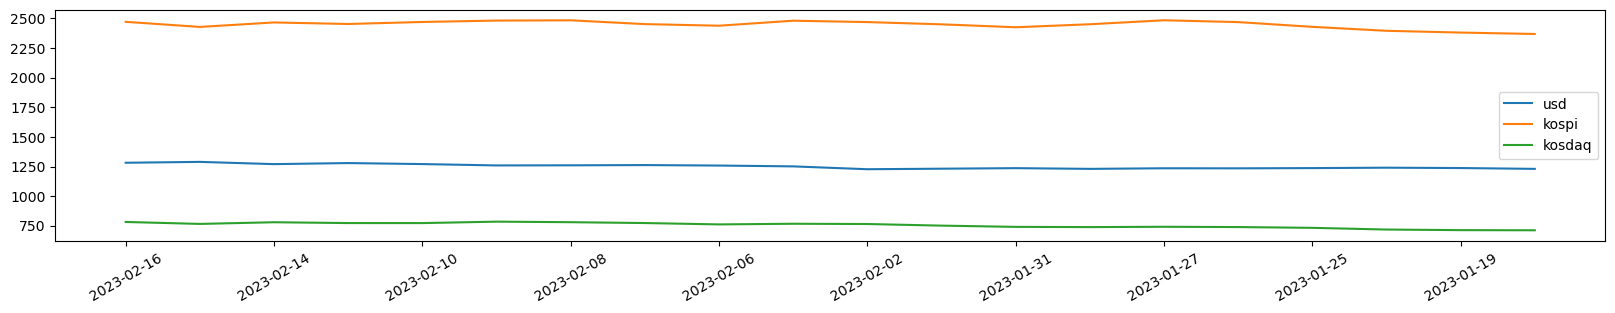

In [121]:
plt.figure(figsize=(20,3))
plt.plot(df['localTradedAt'], df['usd'], label='usd')
plt.plot(df['localTradedAt'], df['kospi'], label='kospi')
plt.plot(df['localTradedAt'], df['kosdaq'], label='kosdaq')
plt.legend()
plt.xticks(df['localTradedAt'][::2],rotation=30)
plt.show()

In [98]:
#lambda : 파라미터와 리턴으로 이루어진 함수를 간단하게 작성하는 방법
def plus(x,y):
    return x+y
def minus(x,y):
    return x-y
def calc(func,x,y):
    return func(x,y)
print('aaaaaaa', calc(plus,2,1))
plus_lambda = lambda n1, n2: n1 + n2
print('bbbbbbb', plus_lambda(2,1))

In [106]:
#얕은복사 깊은복사
data1=[1,2,3] 
data2=data1 #얕은복사
data3=data1.copy() #깊은복사
print(data1,data2,data3)

[1, 2, 3] [1, 2, 3] [1, 2, 3]


In [108]:
data2[1]=4
data3[0]=9
print(data1,data2,data3)
print(id(data1),id(data2),id(data3))

[1, 4, 3] [1, 4, 3] [9, 2, 3]
2073407582600 2073407582600 2073407212936


#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

In [123]:
from sklearn.preprocessing import minmax_scale

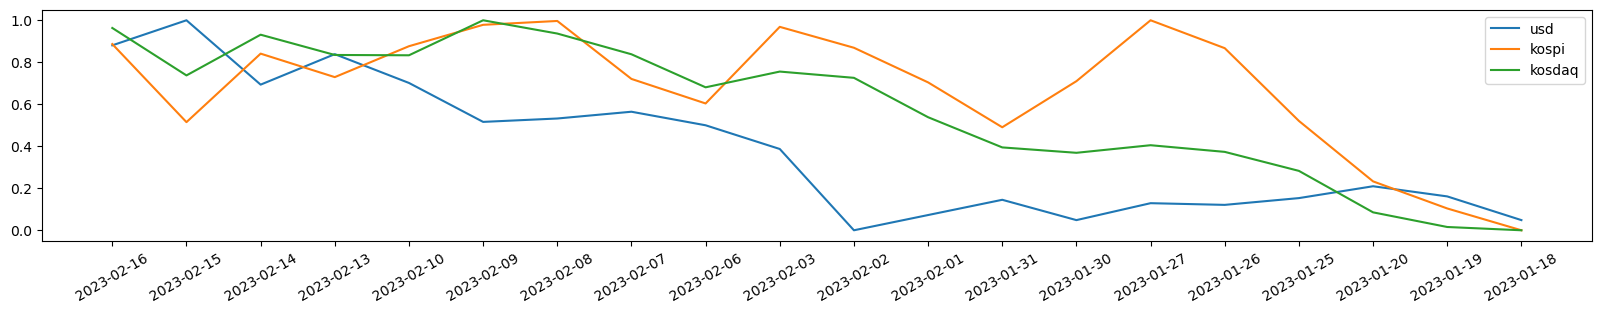

In [125]:
plt.figure(figsize=(20,3))
plt.plot(df['localTradedAt'], minmax_scale(df['usd']), label='usd')
plt.plot(df['localTradedAt'], minmax_scale(df['kospi']), label='kospi')
plt.plot(df['localTradedAt'], minmax_scale(df['kosdaq']), label='kosdaq')
plt.legend()
#plt.xticks(df['localTradedAt'][::2])
plt.xticks(rotation=30)
plt.show()

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [126]:
df.corr()

,usd,kospi,kosdaq
usd,1.000000,0.291469,0.719686
kospi,0.291469,1.000000,0.778691
kosdaq,0.719686,0.778691,1.000000
